# **Deep Residual Networks (ResNets)**

Pytorch Kütüphanesi kullanılacaktır.

**CNN vs Deep Residual Networks**

On binlerce görselden oluşan datayı sınıflandırmak için CNN kullanıldığında;

CNN bir deep neural network yapısı olduğundan ve datada binlerce sınıf bulunduğundan layer sayısı artırıldığında daha iyi classification yapacağı düşünülmekteydi.

Çünkü deep learning'de kullanılan veri sayısı çok fazla olduğundan bu verinin üstesinden gelebilmek için derinlere inmek gerekir.

Ancak ilerledikçe, iterasyon sayısı arttıkça öğrenme yavaşlamıştır ve sonunda öğrenme durmuştur.

50 layer kullanılan neural network ile 20 layer kullanılan bir neural network karşılaştırıldığında, 50 layer ile oluşturulan CNN yapısının bir yerden sonra öğrenmeyi durdurduğu ve 20 layer ile daha iyi sonuç alındığı gözlemlenmiştir.

Bu durumda neural network derinleştikçe daha iyi öğreneceği teorisi çürütülmüş olmuştur.

Bu problemin üstesinden gelebilmek için ResNets yapısına geçilmiştir.

ResNets yapısında input ile output arasına shortcut atılmıştır. Yani outputa input eklenmiştir. Bu yapı tekrarlanarak ResNets yapısı oluşturulmuştur.

ResNets ile CNN'de derinlere indikçe ortaya çıkan vanishing gradient problem ortadan kaldırılmışır.

Resnets yapısını Microsoft Research grubundakiler keşfetmiştir.

**Vanishing Gradient Problem**

ResNets'in ortaya çıkmasının en önemli nedenlerinden biri vanishing gradient problem'dır.

Amaç kedi ve köpek görsellerinden oluşan bir datayı sınıflandırmak olsun.

nxn'lik input layer weightler ile hidden layer'a bağlıdır.

3 hidden layer ve 1 output layerdan oluşsun.

Kedi görselinde 1. hidden layerda düz çizgi gibi basit şekiller (low level featurelar) öğrenilecektir.

Bu low level featurelar herhangi bir resmi tanımlayabilecek köşeler,kenarlar gibi featurelardır.

Bir sonraki layer olan 2. hidden layerda daha complex şekiller (middle level featurelar) ortaya çıkar.

Son hidden layerda kedinin kuyruğunun yapısı ya da kedinin kulağının yapısı gibi daha karmaşık şekiller öğrenilecektir. 3. hidden layer ise high level feature'dır.

2 class olduğundan 3 hidden layer ile classification yapılabilir.

Binlerce class olduğundan bu hidden layer sayısı yetmeyecektir.

Layer sayısı artırılıp high level feature'lara yaklaştıkça bilgi kaybı yaşanmaktadır.

Yani uzun bir network yapısı olduğunda her adımda high level'ı etkileyen low level bilgisi kaybolmaya başlamaktadır.

**Low levellardaki bilgi kaybetme problemine vanishing gradient problem denir.**

Yani vanishing gradient problem bilgi kaybetme problemidir. Bilgi de low levellarda kaybedilir.

Gradient weight'e göre loss function'ın türevidir.

gradient = ∂loss / ∂weight 

Neural network'te öğrenilen weight'lerdir.

**weight = weight - learning rate * (∂loss / ∂weight)**

Loss'un weight'e göre türevini neural network'ün derinliği belirler.

Derinliği belirleyen ise kullanılan data ve sahip olunan donanımdır.

Yani 50 layer içeren bir neural network 20 layer içeren bir neural network'e göre başarısız olabilir.

**(∂loss / ∂w2) * (∂w2/∂w1) = ∂loss/∂w1** -> gradient bu şekilde adım adım, her bir layerdan geçerek ortaya çıkar.

Neural network yapısı derinleştikçe;

(∂loss / ∂wn) * (∂wn/∂wn-1) ... * (∂w2/∂w1) = gradient

Amaç w1'i güncellemek olduğundan;

w1 = w1 - learning rate * gradient

Neural network eğitiminin belli bir aşamasında,

w1 = 0.1

learning rate = 0.01
 
(∂w2/∂w1) = 0.1

ve n=10 olsun. Bu durumda, 

gradient = 0,0000000001 

w1 = w1 - learning rate * gradient

w1 = 0.1 - 0.01 * 0,0000000001 = 0,099999999999 

Türev değeri ihmal edilebilecek kadar küçük bir değer olduğundan güncellenen w1 değeri yaklaşık 0.1 çıkmıştır, bu durumda w1 değeri güncellenememiştir.

**Neural network derinleştikçe loss'a göre türev alınırken türev değerinin ihmal edilebilecek kadar küçük çıkması ve low level'lardaki parametrenin güncellenememesi durumu vanishing gradient problem'dır.**

**Bu problemde weight değerleri güncellenemediğinden input'tan output'a bilgi akışı kesilir ve öğrenme olmaz, network'e bir katkı yoktur.**

**Bunun çözümü Resnet adı verilen yapılardır.**

**Deep Residual Networks**

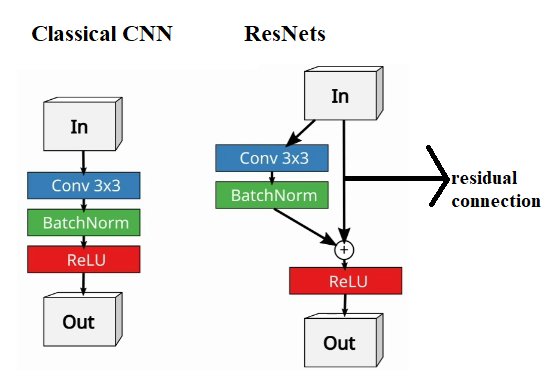

CNN'de güncelleme yapılırken her bir layer bir önceki layer'dan gelen güncellemeye bağlıdır ve bu bilgi akışı sequential olduğundan vanishing gradient problem ortaya çıkar.

Vanishing gradient problemi çözmek için residual connection(shortcut) adında bir yapı oluşturulmuştur.

Bu shortcut sayesinde önceki layerlardaki bilgi hiçbir işleme uğramadan direkt bir sonraki layer'a aktarılır.

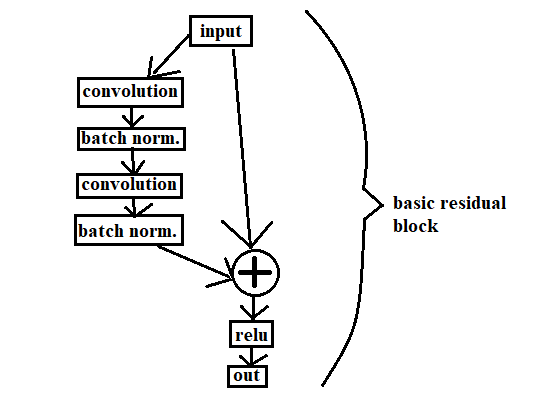

Temel ResNets yapısı bu şekildedir.

ResNets yapısı kurulurken bu bloklar bir araya getirilir.

**IR Pedestrian Dataset**

Bu datada infrared görüntüler bulunmaktadır.

Görüntülerde yaya bulunuyorsa positive, bulunmuyorsa negative olarak sınıflandırılmıştır.

İlk olarak CNN daha sonra ResNet kullanılarak classification yapılacaktır.



In [ ]:
#libraries
import torch
import torch.nn as nn
import torch.nn.functional as F
from PIL import Image #PIL -> python image library
import matplotlib.pyplot as plt
import numpy as np
import os #görseller klasörden çekilirken kullanılacaktır.
import time #algoritmanın çalışma zamanı için kullanılır.

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu') # GPU kontrolü


#Additional info when using cuda
if device.type == 'cuda':
    print(torch.cuda.get_device_name(0))
    print('Memory Usage:')
    print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
    print('Cached:   ', round(torch.cuda.memory_reserved(0)/1024**3,1), 'GB')

NVIDIA GeForce RTX 3050 Laptop GPU
Memory Usage:
Allocated: 0.0 GB
Cached:    0.0 GB


**Data Preprocessing for CNN Model**

In [ ]:
def read_images(path, num_img):
    array = np.zeros([num_img, 64*32]) #64x32 görsellerin boyutu
    i = 0
    for img in os.listdir(path):
        img_path = path + "\\" + img #klasör + 00000.png
        img = Image.open(img_path, mode = "r") #r -> read
        data = np.asarray(img, dtype = "uint8") #görsellerin type'ı uint8'dir.
        data = data.flatten() #array'de depolanmak için görseller düzleştirilir.
        array[i,:] = data
        i += 1
    return array

Klasöredeki tüm görseller düzleştirilip array'de depolanmıştır.

In [ ]:
#read train negative (43390 sample)
train_negative_path = r"C:\Users\ŞEVVAL\Desktop\LSIFIR\Classification\Train\neg"
num_train_negative_img = 43390
train_negative_array = read_images(train_negative_path, num_train_negative_img) 

In [ ]:
x_train_negative_tensor = torch.from_numpy(train_negative_array)
print("x_train_negative_tensor:", x_train_negative_tensor.size())

x_train_negative_tensor: torch.Size([43390, 2048])


tek boyutlulara array, iki boyutlulara matrix, çok boyutlulara ise tensor denir.
x_train size'ı datada bilgi olarak verilmişti. 
Kontrol edilmek için tekrardan bakılır.

In [ ]:
y_train_negative_tensor = torch.zeros(num_train_negative_img, dtype = torch.long)
print("y_train_negatice_tensor:", y_train_negative_tensor.size())

y_train_negatice_tensor: torch.Size([43390])


negative class için y_train label belirlenir.
negative olduğu için 0'lardan oluşur.

In [ ]:
#read train positive (10208 sample)
train_positive_path = r"C:\Users\ŞEVVAL\Desktop\LSIFIR\Classification\Train\pos"
num_train_positive_img = 10208
train_positive_array = read_images(train_positive_path, num_train_positive_img) 

In [ ]:
x_train_positive_tensor = torch.from_numpy(train_positive_array)
print("x_train_positive_tensor:", x_train_positive_tensor.size())

x_train_positive_tensor: torch.Size([10208, 2048])


In [ ]:
y_train_positive_tensor = torch.ones(num_train_positive_img, dtype = torch.long)
print("y_train_positive_tensor:", y_train_positive_tensor.size())

y_train_positive_tensor: torch.Size([10208])


positive class için y_train label belirlenir.
positive olduğu için 1'lerden oluşur.

In [ ]:
#concat train
x_train = torch.cat((x_train_negative_tensor,x_train_positive_tensor),0)
y_train = torch.cat((y_train_negative_tensor,y_train_positive_tensor),0)
print("x_train: ",x_train.size())
print("y_train: ",y_train.size())

x_train:  torch.Size([53598, 2048])
y_train:  torch.Size([53598])


Train datası negative ve positive olarak ayrı klasörlerde bulunduğu için x_train_negative_tensor ve x_train_positive_tensor şeklinde oluşturulmuştu.
Bu featurelar x_train ve y_train olarak birleştirilir.

Bu işlemler tekrardan test datası için de yapılır. 

In [ ]:
#read test neg (22050 sample)
test_negative_path =r"C:/Users/Mert/Desktop/Deep_Learning/Residual_NN_Course_5-1/LSIFIR/Classification/Test/neg"
num_test_negative_img = 22050
test_negative_array = read_images(test_negative_path,num_test_negative_img)
x_test_negative_tensor = torch.from_numpy(test_negative_array[:20855,:])
print("x_test_negative_tensor: ",x_test_negative_tensor.size())
y_test_negative_tensor = torch.zeros(20855,dtype = torch.long)
print("y_test_negative_tensor: ",y_test_negative_tensor.size())

x_test_negative_tensor:  torch.Size([20855, 2048])
y_test_negative_tensor:  torch.Size([20855])


In [ ]:
#read test positive (5944 sample)
test_positive_path = r"C:/Users/Mert/Desktop/Deep_Learning/Residual_NN_Course_5-1/LSIFIR/Classification/Test/pos"
num_test_positive_img = 5944
test_positive_array = read_images(test_positive_path,num_test_positive_img)
x_test_positive_tensor = torch.from_numpy(test_positive_array)
print("x_test_positive_tensor: ",x_test_positive_tensor.size())
y_test_positive_tensor = torch.zeros(num_test_positive_img,dtype = torch.long)
print("y_test_positive_tensor: ",y_test_positive_tensor.size())

x_test_positive_tensor:  torch.Size([5944, 2048])
y_test_positive_tensor:  torch.Size([5944])


In [ ]:
#concat test
x_test = torch.cat((x_test_negative_tensor, x_test_positive_tensor), 0)
y_test = torch.cat((y_test_negative_tensor, y_test_positive_tensor), 0)
print("x_test: ",x_test.size())
print("y_test: ",y_test.size())

x_test:  torch.Size([26799, 2048])
y_test:  torch.Size([26799])


Görseller 1x2048 array formatındadır. Görselleştirmek için reshape methoduyla tekrardan 64x32 boyutuna getirilir.

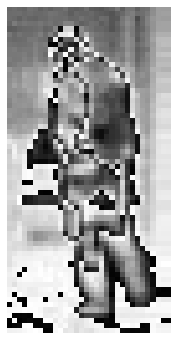

In [ ]:
#visualize
plt.figure(figsize=(10,6))
plt.imshow(x_train[45000,:].reshape(64,32), cmap = "gray")
plt.axis("off")
plt.show()

positive class'tan bir yaya görselleştirilmiştir.

In [ ]:
#Hyperparameter
num_epochs = 10
num_classes = 2
batch_size = 8933
learning_rate = 0.00001

Train datasında 53598 sample bulunmaktadır.

batch size 8933 olarak belirlendiğinde;

53598/8933 = 6 

Her epoch'ta 6 grup oluşacaktır.

Görseller yaya bulunan ve yaya bulunmayan şeklinde ayrıldığı için 2 class bulunmaktadır.

In [ ]:
import torch.utils.data

train = torch.utils.data.TensorDataset(x_train, y_train)
trainloader = torch.utils.data.DataLoader(train, batch_size = batch_size, shuffle = True )
#shuffle=True -> data karıştırılarak eğitilir.

test = torch.utils.data.TensorDataset(x_test, y_test)
testloader = torch.utils.data.DataLoader(test, batch_size = batch_size, shuffle = False )

Oluşturulan train ve test datası tensor formatındaydı, TensorDataset methoduyla datasete çevrilip network'e yüklenmiştir.

DataLoader methoduyla dataset ve samplelar batch size'a göre combine edilir.

# **CNN Model Training with Pytorch**

**Create CNN Model**

In [ ]:
class Net(nn.Module):
    
    def __init__(self): 

        super(Net,self).__init__() #CNN modeli nn.Module'ün initializer'ı çağırılarak inherit edilir.
        
        self.conv1 = nn.Conv2d(1,10,kernel_size = 5) #1=in_channels, 10=out_channels, 5=5x5'lik feature detector
        #output_chanels kullanılacak feature detector sayısıdır.
        self.pool = nn.MaxPool2d(2,2)  #max pooling yöntemi ile 2x2'lik matrix feature map üzerinde gezdirilir.
        self.conv2 = nn.Conv2d(10,16,kernel_size = 5) #10=in_channels, 16=out_channels, 5=5x5'lik feature detector
        #bir önceki layerdan gelen output channel 10 olduğu için input channel 10'dur.
        #16 tane feature detector kullanılacaktır.
        
        """
        bu kısımda layerlar oluşturulmuştur.
        sıralama forward methodunda yapılacaktır.
        pooling'de kullanılacak matrix de aynı boyutta olduğundan tekrardan tanımlanmamıştır.
        2. hidden layer'da kullanılacak convolution layer farklı olduğu için tekrardan tanımlanmıştır.
        """
        
        #fully connected layer
        self.fc1 = nn.Linear(16*13*5,520) 
        self.fc2 = nn.Linear(520,130)     
        self.fc3 = nn.Linear(130,num_classes) 

    def forward(self, x): #forward methodunda layer'lar birbirine bağlanır.
        
        x = self.pool(F.relu(self.conv1(x))) # convolution -> relu -> pooling
        x = self.pool(F.relu(self.conv2(x))) # convolution -> relu -> pooling
        
        x = x.view(-1,16*13*5) #pytorch'ta view methoduyla flatten yapılarak tek bir vektör elde edilir.
        x = F.relu(self.fc1(x)) 
        x = F.relu(self.fc2(x))
        x = self.fc3(x) #output layer
        #output layer'dan bir probabilistic bir değer olan y_head değeri oluşur.
        #Daha sonra y_head ve y_real değerleri loss function içerisine koyulup loss değeri hesaplanacaktır. -> loss(y_head,y_real)
        
        #x (input) ->  convolution -> relu -> pooling ->  convolution -> relu -> pooling -> flatten ->
        #fully connected 1 -> relu -> fully connected 2 -> relu -> fully connected 3 -> relu -> output
        
        return x 

**Instantiate Model Class**

In [ ]:
net = Net().to(device)

Modelin inputları fully connected layerda belirlendiği için modele input verilmemiştir.

In [ ]:
#loss 
criterion = nn.CrossEntropyLoss()

y_head değerinin gireceği softmax activation function CrossEntropyLoss methodunun içerisinde bulunur.

CrossEntropyLoss methoduyla loss değeri hesaplanır.

In [ ]:
#optimizer
import torch.optim as optim
optimizer = optim.SGD(net.parameters(), lr = learning_rate, momentum=0.8)
#momentum, stochastic gradient descent'in hızlanma parametresidir.

Stochastic Gradient Descent yöntemi ile parametreler güncellenecektir.

In [ ]:
#train a network
start = time.time() #başlangıç zamanı tutulur.
train_acc = []
test_acc = []
loss_list = []
use_gpu = True

In [ ]:
for epoch in range(num_epochs):
    for i, data in enumerate(trainloader, 0):
        #0'dan başlayarak trainloader'daki görsel sayısı kadar döner.
        
        inputs, labels = data 
        #data görselleri ve görsellerin ait olduğu classları(1,0) return eder.
        inputs = inputs.view(batch_size, 1, 64, 32) 
        #view methoduyla pytorch'ta reshape yapılır.
        inputs = inputs.float() 
        #görsellerin type'ı uint8'den floata çevrilir.
        
        # use gpu
        if use_gpu:
            if torch.cuda.is_available():
                inputs, labels = inputs.to(device), labels.to(device)
        
        #zero gradient
        optimizer.zero_grad() #her adımda türevler sıfırlanmazsa toplanarak gider.
                              #otomatik olarak sıfırlanmaz.
        
        #Forward propagation yapılması için model çağrılır.
        outputs = net(inputs)
        
        #softmax ve cross entropy loss hesaplanır.
        loss = criterion(outputs, labels)
        
        #Calculating gradients
        loss.backward()
        #loss'un parametrelere göre türevi alınarak, parametrelerin ne kadar güncelleneceği bulunur.
        
        #update weights
        optimizer.step()
        #parametreler update edilir. (w = w- learning_rate*gradient)
        
        #test
    correct = 0 #ne kadar doğru bilindiği
    total = 0   #ne kadar data olduğu
    with torch.no_grad(): #no_grad methoduyla back_propagation biter.
        
        for data in testloader:
            images, labels= data
            #data görselleri ve görsellerin ait olduğu classları(1,0) return eder.
            images = images.view(batch_size,1,64,32) #reshape
            images = images.float() #float
            
            #gpu
            if use_gpu:
                if torch.cuda.is_available():
                    images, labels = images.to(device), labels.to(device)
            
            outputs = net(images)
            
            _, predicted = torch.max(outputs.data,1)
            
            total += labels.size(0) #kaç veri bulunduğu üzerine eklenerek gider.
            correct += (predicted == labels).sum().item()
            
    acc1 = 100*(correct/total)
    print("accuracy test: ",acc1)

    #store accuracy
    test_acc.append(acc1)
    
    
    # train
    correct = 0
    total = 0
    with torch.no_grad():
        for data in trainloader:

            images, labels= data
            #data görselleri ve görsellerin ait olduğu classları(1,0) return eder.

            images = images.view(batch_size,1,64,32)
            #view methoduyla pytorch'ta görseller flatten yapılarak bir vektör haline getirilir.
            
            images = images.float()
            #görsellerin type'ı uint8'den floata çevrilir.
            
            # gpu
            if use_gpu:
                if torch.cuda.is_available():
                    images, labels = images.to(device), labels.to(device)

            #Forward propagation
            outputs = net(images)
            #prediction işlemi gerçekleştirilerek probabilistic bir sonuç ortaya çıkar.
            
            _, predicted = torch.max(outputs.data,1)
            #probabilistic değerlerden en olası olana bakılır.
            
            total += labels.size(0)
            #test datasında kaç sample olduğuna bakılır.

            correct += (predicted == labels).sum().item()
            #predicted ile total aynı ise doğru tahmindir, correct isimli variable'a eklenir.
        
    acc2 = 100*(correct/total)
    print("accuracy train: ",acc2)

    #store accuracy
    train_acc.append(acc2)


print("train is done.")

accuracy test:  90.46233068398074
accuracy train:  79.11302660547035
accuracy test:  98.5633792305683
accuracy train:  80.74741594835628
accuracy test:  96.17523041904549
accuracy train:  80.81831411619837
accuracy test:  92.42135900593306
accuracy train:  80.74555020709728
accuracy test:  93.04824806895779
accuracy train:  81.20265681555281
accuracy test:  94.29083174745327
accuracy train:  81.64297175267734
accuracy test:  94.19381320198514
accuracy train:  81.92843016530468
accuracy test:  93.79827605507668
accuracy train:  82.16537930519794
accuracy test:  93.85797977536475
accuracy train:  82.43777752901228
accuracy test:  93.88410015299078
accuracy train:  82.73256464793462
train is done.


In [ ]:
end = time.time()
process_time = (end - start)/60
print("process time: ",process_time)

process time:  0.5529210011164347


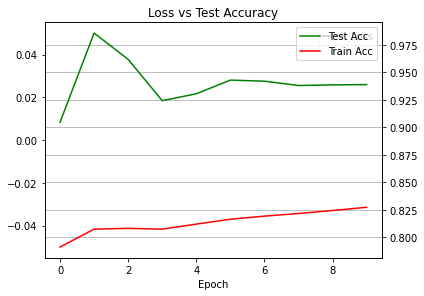

In [ ]:
#visualize
fig, ax1 = plt.subplots()
plt.plot(loss_list,label = "Loss",color = "black")
ax2 = ax1.twinx()
ax2.plot(np.array(test_acc)/100,label = "Test Acc",color="green")
ax2.plot(np.array(train_acc)/100,label = "Train Acc",color= "red")
ax1.legend()
ax2.legend()
ax1.set_xlabel('Epoch')
fig.tight_layout()
plt.title("Loss vs Test Accuracy")
plt.grid()
plt.show()

# **ResNets Model Training with Pytorch**

In [ ]:
#Dataset
def read_images(path, num_img):
    array = np.zeros([num_img,64*32])
    i = 0
    for img in os.listdir(path):
        img_path = path + "\\" + img
        img = Image.open(img_path, mode = 'r')
        data = np.asarray(img,dtype = "uint8")
        data = data.flatten()
        array[i,:] = data
        i += 1      
    return array

**Data Preprocessing for ResNet Model**

In [ ]:
#read train negative  (42000 sample)
train_negative_path = r"C:\Users\ŞEVVAL\Desktop\LSIFIR\Classification\Train\neg"
num_train_negative_img = 43390
train_negative_array = read_images(train_negative_path,num_train_negative_img)
x_train_negative_tensor = torch.from_numpy(train_negative_array[:42000,:])
print("x_train_negative_tensor: ",x_train_negative_tensor.size())
y_train_negative_tensor = torch.zeros(42000,dtype = torch.long)
print("y_train_negative_tensor: ",y_train_negative_tensor.size())

x_train_negative_tensor:  torch.Size([42000, 2048])
y_train_negative_tensor:  torch.Size([42000])


In [ ]:
#read train positive (10000 sample)
train_positive_path = r"C:\Users\ŞEVVAL\Desktop\LSIFIR\Classification\Train\pos"
num_train_positive_img = 10208
train_positive_array = read_images(train_positive_path,num_train_positive_img)
x_train_positive_tensor = torch.from_numpy(train_positive_array[:10000,:])
print("x_train_positive_tensor: ",x_train_positive_tensor.size())
y_train_positive_tensor = torch.ones(10000,dtype = torch.long)
print("y_train_positive_tensor: ",y_train_positive_tensor.size())

x_train_positive_tensor:  torch.Size([10000, 2048])
y_train_positive_tensor:  torch.Size([10000])


In [ ]:
#concat train
x_train = torch.cat((x_train_negative_tensor, x_train_positive_tensor), 0)
y_train = torch.cat((y_train_negative_tensor, y_train_positive_tensor), 0)
print("x_train: ",x_train.size())
print("y_train: ",y_train.size())

x_train:  torch.Size([52000, 2048])
y_train:  torch.Size([52000])


In [ ]:
#read test negative (18056 sample)
test_negative_path = r"C:\Users\ŞEVVAL\Desktop\LSIFIR\Classification\Test\neg"
num_test_negative_img = 22050
test_negative_array = read_images(test_negative_path,num_test_negative_img)
x_test_negative_tensor = torch.from_numpy(test_negative_array[:18056,:])
print("x_test_negative_tensor: ",x_test_negative_tensor.size())
y_test_negative_tensor = torch.zeros(18056,dtype = torch.long)
print("y_test_negative_tensor: ",y_test_negative_tensor.size())

x_test_negative_tensor:  torch.Size([18056, 2048])
y_test_negative_tensor:  torch.Size([18056])


In [ ]:
#read test positive (5944 sample)
test_positive_path = r"C:\Users\ŞEVVAL\Desktop\LSIFIR\Classification\Test\pos"
num_test_positive_img = 5944
test_positive_array = read_images(test_positive_path,num_test_positive_img)
x_test_positive_tensor = torch.from_numpy(test_positive_array)
print("x_test_positive_tensor: ",x_test_positive_tensor.size())
y_test_positive_tensor = torch.zeros(num_test_positive_img,dtype = torch.long)
print("y_test_positive_tensor: ",y_test_positive_tensor.size())

x_test_positive_tensor:  torch.Size([5944, 2048])
y_test_positive_tensor:  torch.Size([5944])


In [ ]:
#concat test
x_test = torch.cat((x_test_negative_tensor, x_test_positive_tensor), 0)
y_test = torch.cat((y_test_negative_tensor, y_test_positive_tensor), 0)
print("x_test: ",x_test.size())
print("y_test: ",y_test.size())

x_test:  torch.Size([24000, 2048])
y_test:  torch.Size([24000])


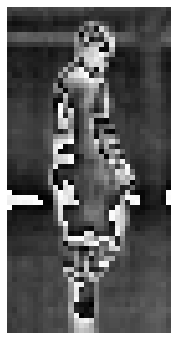

In [ ]:
plt.figure(figsize=(10,6))
plt.imshow(x_train[45000,:].reshape(64,32), cmap = "gray")
plt.axis("off")
plt.show()

In [ ]:
#Hyperparameters
num_classes = 2
num_epochs = 20
batch_size = 2000
learning_rate = 0.0001

Train datasında 52000 sample bulunmaktadır.

batch size 2000 olarak belirlendiğinde;

52000/2000 = 26

Her epoch'ta 26 grup oluşacaktır.

Görseller yaya bulunan ve yaya bulunmayan şeklinde ayrıldığı için 2 class bulunmaktadır.

In [ ]:
train = torch.utils.data.TensorDataset(x_train,y_train)
trainloader = torch.utils.data.DataLoader(train, batch_size = batch_size, shuffle = True)

In [ ]:
test = torch.utils.data.TensorDataset(x_test,y_test)
testloader = torch.utils.data.DataLoader(test, batch_size = batch_size, shuffle = False)

Oluşturulan train ve test datası tensor formatındaydı, TensorDataset methoduyla datasete çevrilip network'e yüklenmiştir.

DataLoader methoduyla dataset ve samplelar batch size'a göre combine edilir.

In [ ]:
#1. convolutional layer
def conv3x3(in_planes, out_planes, stride = 1): 
    return nn.Conv2d(in_planes, out_planes, kernel_size = 3, stride = stride, padding = 1, bias = False)

kernel size -> 3x3

in_planes -> input image'ındaki channel sayısı(rgb, gray_scale)

out_planes -> layerdaki nöron sayısı

stride -> filtre ile tarama yaparken kaçar kaçar kayacağının bilgisi

batch normalization yapılacağı için bias'a gerek kalmayacaktır.

In [ ]:
#2. convolutional layer
def conv1x1(in_planes, out_planes, stride = 1):
    return nn.Conv2d(in_planes, out_planes, kernel_size = 1, stride = stride, bias = False)

**Create Basic Block**

In [ ]:
class BasicBlock(nn.Module):
    
    expansion = 1
    
    #convolution1 -> batch normalization1 -> relu -> dropout ->
    #convolution2 -> batch normalization2 -> downsample (pooling) -> stride (padding)
    def __init__(self,inplanes, planes, stride = 1, downsample = None):
        super(BasicBlock,self).__init__()
        self.conv1 = conv3x3(inplanes, planes, stride)
        self.bn1 = nn.BatchNorm2d(planes)
        self.relu = nn.ReLU(inplace = True) #inplace=True ile sonuç relu değişkenine eşitlenir.
        self.drop = nn.Dropout(0.9)
        self.conv2 = conv3x3(planes, planes)
        self.bn2 = nn.BatchNorm2d(planes)
        self.downsample = downsample
        self.stride = stride
    
    #forward propagation
    #x (input) ->convolution1 -> batch normalization1 -> relu -> dropout ->
    #convolution2 -> batch normalization2 -> dropout 
    #x (input) -> shortcut -> relu (+) output
    def forward(self, x):
        identity = x
        
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.drop(out)
        out = self.conv2(out)
        out = self.bn2(out)
        out = self.drop(out)
        
        if self.downsample is not None: 
            identity = self.downsample(x)
            
        """
        stride 1 olduğunda input ile feature map size'ı aynı olur.
        Ancak stride 2 olduğunda 2 convolutional layer sonucu boyut yarı yarıya azalır.
        reluda input ile boyutu azalmış output matrix toplamı yapılamaz.
        Bu yüzden eğer stride 1 değilse input'a downsample yapılıp convolution sonucu oluşan output'a eşitlenir.
        
        """
            
        out += identity #
        out = self.relu(out)
        return out

**Create ResNet Model**

In [ ]:
class ResNet(nn.Module):
    
    #convolution1, batch normalization, relu, max pooling ve hidden layerlar inherit edilir.
    def __init__(self, block, layers, num_classes = num_classes):
        super(ResNet,self).__init__()
        self.inplanes = 64 #input channel
        self.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride = 2, padding = 3, bias= False)
        #input channel -> 1
        #output channel -> 64 -> 64 tane feature detector kullanılacaktır.
        #feature detector -> 7x7
        #stride -> 2 olduğundan down sampling yapılacaktır.
        self.bn1 = nn.BatchNorm2d(64)
        self.relu = nn.ReLU(inplace = True)
        self.maxpool = nn.MaxPool2d(kernel_size= 3, stride = 2, padding = 1)
        #feature detector-> 3x3
        self.layer1 = self._make_layer(block, 64, layers[0], stride = 1)
        self.layer2 = self._make_layer(block, 128, layers[1], stride = 2)
        self.layer3 = self._make_layer(block, 256, layers[2], stride = 2)
    
        self.avgpool = nn.AdaptiveAvgPool2d((1,1))
        self.fc = nn.Linear(256*block.expansion, num_classes)
        
        for m in self.modules():
            if isinstance(m,nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode = "fan_out", nonlinearity = "relu")
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.constant_(m.weight,1)
                nn.init.constant_(m.bias,0)
    
    #basic blocklar bir araya getirilerek ResNets yapısı oluşturulur.
    #blocks parametresi ile bloklar birbirine bağlanır.
    def _make_layer(self, block, planes, blocks, stride = 1):
        downsample = None
        if stride != 1 or self.inplanes != planes*block.expansion:
            downsample = nn.Sequential(
                    conv1x1(self.inplanes, planes*block.expansion, stride),
                    nn.BatchNorm2d(planes*block.expansion))
            
        layers = []
        layers.append(block(self.inplanes, planes, stride, downsample))
        self.inplanes = planes*block.expansion
        for _ in range(1,blocks):
            layers.append(block(self.inplanes, planes))
        
        return nn.Sequential(*layers)
        
    
    def forward(self,x):
        
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.avgpool(x)
        x = x.view(x.size(0),-1)
        x = self.fc(x)
        
        return x

**Create ResNet Model**

In [ ]:
model = ResNet(BasicBlock, [2,2,2]).to(device) #makelayer kısmında oluşturulacak blok sayısı 2 olarak belirlenmiştir.

**Instantiate Loss Class**

In [ ]:
criterion = nn.CrossEntropyLoss()

y_head değerinin gireceği softmax activation function CrossEntropyLoss methodunun içerisinde bulunur.

CrossEntropyLoss methoduyla loss değeri hesaplanır.

**Instantiate Optimizer Class**

In [ ]:
optimizer = torch.optim.Adam(model.parameters(),lr = learning_rate)

Adaptive momentum yöntemi ile parametreler güncellenecektir.

**Training Model and Prediction**

In [ ]:
#train

loss_list = []
train_acc = []
test_acc = []
use_gpu = True

total_step = len(trainloader)

for epoch in range(num_epochs):
    epoch_time_start = time.time()
    for i, (images, labels) in enumerate(trainloader):
        
        images = images.view(batch_size,1,64,32)
        #view methoduyla pytorch'ta reshape yapılır.
        images = images.float()
        #görsellerin türü uint8'den floata çevrilir.
        
        #gpu
        if use_gpu:
      
            if torch.cuda.is_available():
                images, labels = images.to(device), labels.to(device)
            
        outputs = model(images)
        #Forward propagation yapılması için model çağrılır.
        
        loss = criterion(outputs, labels)
        #softmax ve cross entropy loss hesaplanır.
        
        optimizer.zero_grad()
        #her adımda türevler sıfırlanmazsa toplanarak gider.
        #otomatik olarak sıfırlanmaz.

        #calculating gradients
        loss.backward()
        #loss'un parametrelere göre türevi alınarak, parametrelerin ne kadar güncelleneceği bulunur.

        optimizer.step()
        #parametreler update edilir. (w = w- learning_rate*gradient)
        
        if i % 2 == 0:
            print("epoch: {} {}/{}".format(epoch+1,i,total_step))

    # train
    correct = 0
    total = 0
    with torch.no_grad():
        for data in trainloader:

            images, labels = data
            #data görselleri ve görsellerin ait olduğu classları(1,0) return eder.

            images = images.view(batch_size,1,64,32)
            #view methoduyla flatten yapılarak tek bir vektör haline getirilir.

            images = images.float()
            #görsellerin türü uint8'den floata çevrilir.
            
            #gpu
            if use_gpu:
                if torch.cuda.is_available():
                    images, labels = images.to(device), labels.to(device)

            #Forward propagation       
            outputs = model(images)
            #prediction işlemi gerçekleştirilerek probabilistic bir sonuç ortaya çıkar.

            _, predicted = torch.max(outputs.data,1)
            #probabilistic değerlerden en olası olana bakılır.

            total += labels.size(0)
            #test datasında kaç sample olduğuna bakılır.

            correct += (predicted == labels).sum().item()
            #predicted ile total aynı ise doğru tahmindir, correct isimli variable'a eklenir.

    print("Accuracy train %d %%"%(100*(correct/total)))
    train_acc.append(100*(correct/total))

    # test
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:

            images, labels = data
            #data görselleri ve görsellerin ait olduğu classları(1,0) return eder.

            images = images.view(batch_size,1,64,32)
            #view methoduyla flatten yapılarak tek bir vektör haline getirilir.

            images = images.float()
            #görsellerin türü uint8'den floata çevrilir.
            
            #gpu
            if use_gpu:
                if torch.cuda.is_available():
                    images, labels = images.to(device), labels.to(device)

            #Forward propagation       
            outputs = model(images)
            #prediction işlemi gerçekleştirilerek probabilistic bir sonuç ortaya çıkar.

            _, predicted = torch.max(outputs.data,1)
            #probabilistic değerlerden en olası olana bakılır.

            total += labels.size(0)
            #test datasında kaç sample olduğuna bakılır.

            correct += (predicted == labels).sum().item()
            #predicted ile total aynı ise doğru tahmindir, correct isimli variable'a eklenir.

    print("Accuracy test %d %%"%(100*(correct/total)))
    test_acc.append(100*(correct/total))

    #store loss and time
    epoch_time_end = time.time()
    epoch_process_time = (epoch_time_end - epoch_time_start)/60
    loss_list.append(loss.item())

    print("{}. Epoch -----> Time :{} -----> Train accuracy:{} -----> Test accuracy:{} -----> Loss:{}".format(epoch+1,round(epoch_process_time,2),round(train_acc[epoch],2),round(test_acc[epoch],2),round(loss_list[epoch],2)))

epoch: 1 0/26
epoch: 1 2/26
epoch: 1 4/26
epoch: 1 6/26
epoch: 1 8/26
epoch: 1 10/26
epoch: 1 12/26
epoch: 1 14/26
epoch: 1 16/26
epoch: 1 18/26
epoch: 1 20/26
epoch: 1 22/26
epoch: 1 24/26
Accuracy train 77 %
Accuracy test 94 %
1. Epoch -----> Time :0.22 -----> Train accuracy:77.38 -----> Test accuracy:94.69 -----> Loss:0.54
epoch: 2 0/26
epoch: 2 2/26
epoch: 2 4/26
epoch: 2 6/26
epoch: 2 8/26
epoch: 2 10/26
epoch: 2 12/26
epoch: 2 14/26
epoch: 2 16/26
epoch: 2 18/26
epoch: 2 20/26
epoch: 2 22/26
epoch: 2 24/26
Accuracy train 79 %
Accuracy test 98 %
2. Epoch -----> Time :0.21 -----> Train accuracy:79.88 -----> Test accuracy:98.19 -----> Loss:0.46
epoch: 3 0/26
epoch: 3 2/26
epoch: 3 4/26
epoch: 3 6/26
epoch: 3 8/26
epoch: 3 10/26
epoch: 3 12/26
epoch: 3 14/26
epoch: 3 16/26
epoch: 3 18/26
epoch: 3 20/26
epoch: 3 22/26
epoch: 3 24/26
Accuracy train 79 %
Accuracy test 95 %
3. Epoch -----> Time :0.22 -----> Train accuracy:79.46 -----> Test accuracy:95.26 -----> Loss:0.41
epoch: 4 0/26
ep

**Visualization**

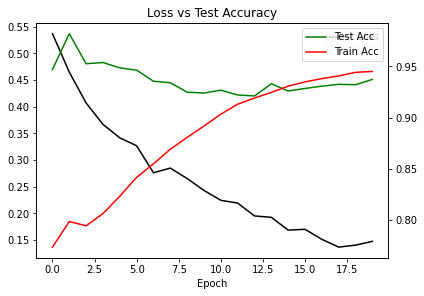

In [ ]:
#visualizing
fig, ax1 = plt.subplots()
plt.plot(loss_list,label = "Loss",color = "black")
ax2 = ax1.twinx()
ax2.plot(np.array(test_acc)/100,label = "Test Acc",color="green")
ax2.plot(np.array(train_acc)/100,label = "Train Acc",color= "red")
ax1.legend()
ax2.legend()
ax1.set_xlabel('Epoch')
fig.tight_layout()
plt.title("Loss vs Test Accuracy")
plt.show()